
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [3]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [4]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [5]:

import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)


     ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0       ไทย            69.8            513120
1       ลาว             7.1            236800
2   กัมพูชา            16.5            181035
3  เวียดนาม            97.3            331210
     ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  ความหนาแน่นประชากร (คน/ตร.กม.)
0       ไทย            69.8            513120                      136.030558
1       ลาว             7.1            236800                       29.983108
2   กัมพูชา            16.5            181035                       91.142597
3  เวียดนาม            97.3            331210                      293.771323



### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/data - data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

ตอบ เป็นข้อมูลเชิงเปรียบเทียบระหว่างจำนวนนักท่องเที่ยวในจังหวัดภูเก็ตและรายได้รายปีในจังหวัดภูเก็ต


## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

  adm1_pcode       province    total     male   female  household  \
0       TH37  Amnat Charoen   378438   188632   189806     117994   
1       TH15      Ang Thong   279654   134095   145559      99928   
2       TH10        Bangkok  5666264  2669316  2996948    3041115   
3       TH38      Bueng Kan   424091   212859   211232     135143   
4       TH31       Buri Ram  1595747   793262   802485     468483   

                                            geometry  
0  MULTIPOLYGON (((104.95982 16.28359, 104.95986 ...  
1  MULTIPOLYGON (((100.33319 14.79853, 100.33341 ...  
2  MULTIPOLYGON (((100.61389 13.95462, 100.61428 ...  
3  MULTIPOLYGON (((103.40496 18.44898, 103.40619 ...  
4  MULTIPOLYGON (((102.93029 15.79514, 102.93029 ...  
EPSG:4326


<Axes: >

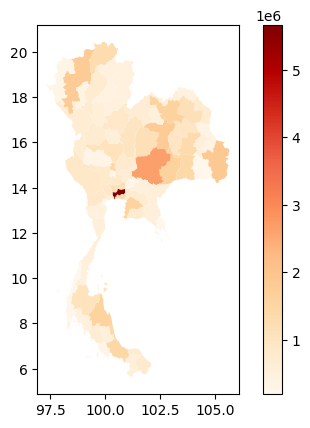

In [8]:
import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/populationthailand.gpkg'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่
geo_data.plot(column='total', cmap='OrRd', legend=True)


## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

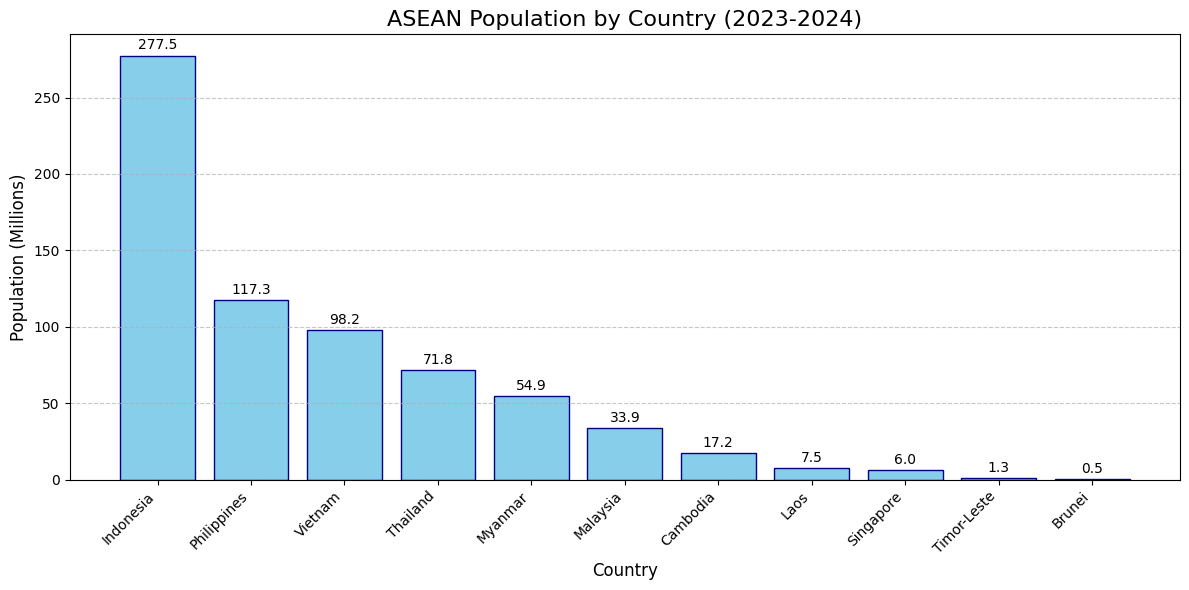

In [9]:
import matplotlib.pyplot as plt

# 1. ข้อมูลประเทศในอาเซียน 11 ประเทศ
countries = [
    'Indonesia', 'Philippines', 'Vietnam', 'Thailand', 'Myanmar',
    'Malaysia', 'Cambodia', 'Laos', 'Singapore', 'Timor-Leste', 'Brunei'
]

# 2. ส่วนที่นักศึกษาต้องเติม: ใส่ข้อมูลประชากร (หน่วย: ล้านคน) ที่หามาได้ลงใน List นี้
# ข้อมูลประชากรโดยประมาณสำหรับปี 2023-2024 (หน่วย: ล้านคน)
populations = [
    277.5, # Indonesia
    117.3, # Philippines
    98.2,  # Vietnam
    71.8,  # Thailand
    54.9,  # Myanmar
    33.9,  # Malaysia
    17.2,  # Cambodia
    7.5,   # Laos
    6.0,   # Singapore
    1.3,   # Timor-Leste
    0.46   # Brunei
]

# ตั้งค่าฟอนต์ที่รองรับภาษาไทยใน Matplotlib (เผื่อใช้ในส่วนอื่น)
plt.rcParams['font.family'] = 'DejaVu Sans' # ตั้งค่าเป็นฟอนต์เริ่มต้นที่มีอยู่
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Garuda', 'Sarabun', 'TH Sarabun New'] # เพิ่มฟอนต์ไทยที่นิยม
plt.rcParams['axes.unicode_minus'] = False # แก้ไขปัญหาเครื่องหมายลบภาษาไทย

# สร้างกราฟ
plt.figure(figsize=(12, 6))
bars = plt.bar(countries, populations, color='skyblue', edgecolor='navy')

# ตกแต่งกราฟ
plt.title('ASEAN Population by Country (2023-2024)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population (Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right') # หมุนชื่อประเทศให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)

# เพิ่มตัวเลขบนหัวแท่งกราฟ
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1), ha='center', va='bottom')

# แสดงผล
plt.tight_layout()
plt.show()


### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

                  adm1_name       adm1_name1 adm1_name2 adm1_name3 adm1_pcode  \
0                   Bangkok    กรุงเทพมหานคร       None       None       TH10   
1              Samut Prakan      สมุทรปราการ       None       None       TH11   
2                Nonthaburi          นนทบุรี       None       None       TH12   
3              Pathum Thani         ปทุมธานี       None       None       TH13   
4  Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา       None       None       TH14   

  adm0_name adm0_name1 adm0_name2 adm0_name3 adm0_pcode  ...    area_sqkm  \
0  Thailand  ประเทศไทย       None       None         TH  ...  1571.371348   
1  Thailand  ประเทศไทย       None       None         TH  ...   949.001112   
2  Thailand  ประเทศไทย       None       None         TH  ...   636.542913   
3  Thailand  ประเทศไทย       None       None         TH  ...  1517.386644   
4  Thailand  ประเทศไทย       None       None         TH  ...  2553.360953   

  version  lang lang1 lang2 lang3                a

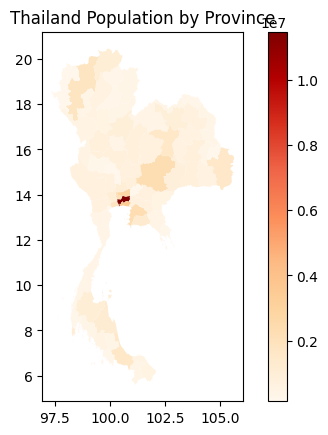

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. อ่าน shapefile
shapefile_path = '/content/drive/MyDrive/lab/maybePV/drive-download-20260209T081347Z-1-001.zip'
geo_data = gpd.read_file(shapefile_path)

print(geo_data.head())
print(geo_data.crs)

# 2. อ่าน population
pop = pd.read_csv('/content/drive/MyDrive/lab/tha_admpop_adm1_2023.csv')

# 3. merge population กับ shapefile
pop.rename(columns={'ADM1_PCODE':'adm1_pcode'}, inplace=True)

geo_data = geo_data.merge(pop, on='adm1_pcode')

# 4. plot population
geo_data.plot(column='T_TL', cmap='OrRd', legend=True)
plt.title('Thailand Population by Province')
plt.show()



## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

1.ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร(5 คะแนน)




In [11]:
import pandas as pd

countries = pd.DataFrame({
    "country": ["Thailand", "Japan", "France"],
    "population": [70000000, 125000000, 67000000],
    "area": [513120, 377975, 551695]
})

new_country = pd.DataFrame([{
    "country": "Vietnam",
    "population": 98000000,
    "area": 331212
}])

countries = pd.concat([countries, new_country], ignore_index=True)

countries["density"] = countries["population"] / countries["area"]

print(countries)





    country  population    area     density
0  Thailand    70000000  513120  136.420331
1     Japan   125000000  377975  330.709703
2    France    67000000  551695  121.443914
3   Vietnam    98000000  331212  295.882999


2.นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)

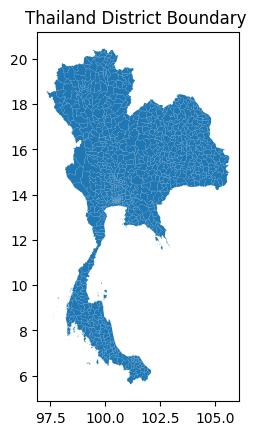

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf2 = gpd.read_file('/content/drive/MyDrive/lab/2.')

gdf2.plot()
plt.title("Thailand District Boundary ")
plt.show()


3.ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น area หรือ density (5 คะแนน)

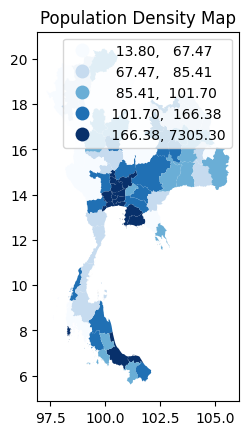

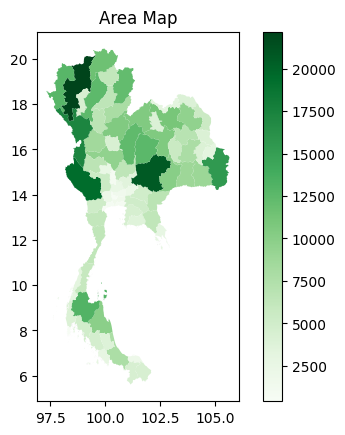

In [16]:
# คำนวณ density
geo_data["density"] = geo_data["T_TL"] / geo_data["area_sqkm"]

# แผนที่ density
geo_data.plot(column='density', cmap='Blues', legend=True, scheme='quantiles')
plt.title("Population Density Map")
plt.show()

# แผนที่ area
geo_data.plot(column='area_sqkm', cmap='Greens', legend=True)
plt.title("Area Map")
plt.show()


credit 2022 Thailand District Population Map, Thailand population data for 2022

: https://staa566-csu.github.io/maps-TStas/?utm_source=chatgpt.com

credit จำนวนประชากรไทยในปี 2562

:https://data.thailand.opendevelopmentmekong.net/th/dataset/thailand-population-2019